In [7]:
import sys
import importlib
sys.path.append('/home/andrea/ownCloud2/laptop/pycharmProject1/')

import utils.function_library 
importlib.reload(utils.function_library)
from utils.function_library import *

For the multivariate Gaussian, we need:
* the covariance matrix (from K1000)
* mean of data vector (xipm from cosmolike wherever I want them, i.e KiDS best-fit, or Planck 2015 best fit)

In [8]:
# DATA COVARIANCE MATRIX
kids_covmat = np.loadtxt("../KiDS1000_cosmis_shear_data_release/data_fits/kids_covariance_matrix")

#COSMOLIKE THEORY VECTOR
mean = np.load("../CosmoCov/covs/xipm/thetatest/vector_xipm_kids_thetatest.npy")[:,0]

In [9]:
data_vectors.shape

(1000, 270)

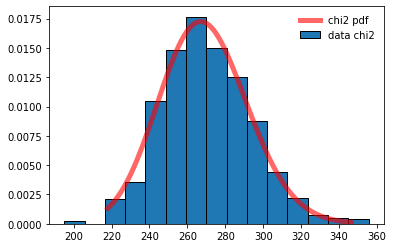

In [13]:
# Draw vector from multivariate Gaussian distribution
Nsamples = 1000
data_vectors = np.random.multivariate_normal(mean, kids_covmat, Nsamples)
np.save("fake_datavectors", data_vectors)

#Calculate chi2 for every sample
chi = []

for i in range(Nsamples):
    Ndim = 270 
    Nparams = 1 #not important since model is non-linear. 
    dof = Ndim - Nparams # degrees of freedom 
    
    chi.append((mean - data_vectors[i]).T @ inv(kids_covmat) @ (mean - data_vectors[i]))
    #print('chi-squared = %.3f, p-value = %r' % (chi, 1 - chi2.cdf(chi, dof)))
    
chi_distr = np.array(chi)
#print('Minimum chi-square to reject null hypothesis: %.3f\n' %(chi2.ppf(0.95, dof))) = 303


x = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.999, dof), 100)

plt.plot(x, chi2.pdf(x, dof),'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.hist(chi_distr, bins=15, density=True, edgecolor="black", label='data chi2')
plt.legend(loc='best', frameon=False)
plt.show()

### Linear approximation of posterior

In [14]:
#load covmat, computed Xmatrix, and parameters from file

# THEORY COVARIANCE MATRIX
theory_covmat = np.load("../notebooks/CovMatrix_class3.0_closer_derivative.npy")

#COSMOLIKE THEORY VECTOR
mean = np.load("../CosmoCov/covs/xipm/Class3.0_closer_derivative/vector_xipm_kids_Class3.0_closer_derivative.npy")

#Xmatrix - computed previously with create_Xmatrix.py
Xmatrix = np.load("../notebooks/X_class3.0_closer_derivative.npy")

# Inifile - important to get cosmo_params, for linear theta
inifile = "../CosmoCov/covs/simulation_settings/inifile_Class3.0_closer_derivative.txt"

# cosmological parameters
cosmo_params = get_cosmological_parameters(inifile, N_parameters=10) 
params_without_bestfit = dict.fromkeys(['Omega_v', 'w0', 'wa', 'IA'])
list(map(cosmo_params.pop, params_without_bestfit))
cosmo_params


{'Omega_m': 0.24,
 'sigma_8': 0.85,
 'n_spec': 0.9,
 'omb': 0.041,
 'h0': 0.68,
 'A_ia': 0.41}

### Note: The derivatives in X must be evaluated at $\theta_I$, just like $\mu(\theta_I)$

In [16]:
np.set_printoptions(suppress=True) #if False, scientific notation on
for i in range(1000):
    if(chi_distr[i] < 265 and chi_distr[i]> 259):
        #print(chi_distr[i])
        data_vec = np.reshape(data_vectors[i], (-1,1))

        lin_theta = linear_theta(Xmatrix.T, theory_covmat, mean, data_vec, cosmo_params)
        #print("linear theta with cosmolike matrix")
        print(lin_theta)

        kids_lin_theta = linear_theta(Xmatrix.T, kids_covmat, mean, data_vec, cosmo_params)
        #print("\n with sigma kids:")
        print(chi_distr[i])
        #print(kids_lin_theta)
    else:
        continue

[[  7.25200592]
 [ 10.38921715]
 [ 46.59685742]
 [  2.14952102]
 [257.77807002]
 [214.19935311]]
263.49066719314123
[[  7.18527017]
 [ 10.43229622]
 [ 47.1229204 ]
 [  2.18648225]
 [259.08092231]
 [218.9348044 ]]
262.175847558016
[[  7.01652387]
 [ 10.20023436]
 [ 46.14464327]
 [  2.14084084]
 [253.50614782]
 [214.50269541]]
263.6049836214127
[[  7.28350364]
 [ 10.39202001]
 [ 46.41101858]
 [  2.13623221]
 [256.70511321]
 [212.49077511]]
264.79564242499094
[[  7.20954675]
 [ 10.37895712]
 [ 46.57345886]
 [  2.15132068]
 [256.60256327]
 [214.71135644]]
260.41364680742686
[[  6.99979319]
 [ 10.12527096]
 [ 45.82431681]
 [  2.12525596]
 [253.53854083]
 [212.62706151]]
259.24657388236636
[[  7.04080684]
 [ 10.23809814]
 [ 46.55350947]
 [  2.16322127]
 [257.12182698]
 [216.89328753]]
259.4942064751858
[[  7.30584939]
 [ 10.55370877]
 [ 47.53279101]
 [  2.19749411]
 [261.28781663]
 [219.6622559 ]]
262.471763285558
[[  7.18259086]
 [ 10.36925553]
 [ 46.85102529]
 [  2.17018751]
 [259.19957477

[[  7.14619235]
 [ 10.43793633]
 [ 47.53804999]
 [  2.211759  ]
 [261.62237323]
 [222.09265083]]
263.4439178568071
[[  7.03321985]
 [ 10.21618735]
 [ 46.11053786]
 [  2.13932415]
 [253.29600623]
 [214.22220102]]
262.6140082983144
[[  7.03865708]
 [ 10.18543699]
 [ 46.04062582]
 [  2.1342058 ]
 [254.37779136]
 [213.52403626]]
260.2819834174397
[[  7.06670322]
 [ 10.21016707]
 [ 46.12763289]
 [  2.13586599]
 [254.70839517]
 [213.5862305 ]]
262.17107378494984
[[  7.15341108]
 [ 10.4468323 ]
 [ 47.1514618 ]
 [  2.1893572 ]
 [257.37040326]
 [219.58786463]]
264.8166384809856
[[  7.23952014]
 [ 10.43225606]
 [ 46.87754485]
 [  2.16693042]
 [258.3244804 ]
 [216.36632897]]
259.4484008740506
[[  7.14160389]
 [ 10.32724847]
 [ 46.6021026 ]
 [  2.15784618]
 [256.88299343]
 [215.80578485]]
261.7901306581971
[[  7.20267933]
 [ 10.3400009 ]
 [ 46.46703168]
 [  2.1449824 ]
 [256.80652768]
 [213.94072347]]
264.5909270463674
[[  7.32853705]
 [ 10.54164867]
 [ 47.07424466]
 [  2.17152423]
 [258.08936619]